# Task 5: Introduction to Computer Vision with OpenCV

## Section 1: Setup & Dataset

### **Task 1**: Load and Display an Image
*Instruction*: Using OpenCV, read an image (`sample.jpg`) and display it using both OpenCV and Matplotlib.

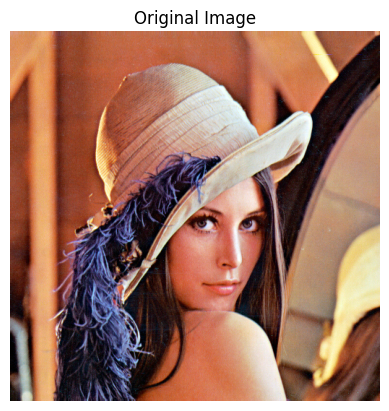

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/sample.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()

## Section 2: Image Properties and Resizing

### **Task 2**: Print Image Properties and Resize

*Instruction*: Print the shape (height, width, channels) of the image. Resize it to 100x100 pixels.


Original Shape: (512, 512, 3)


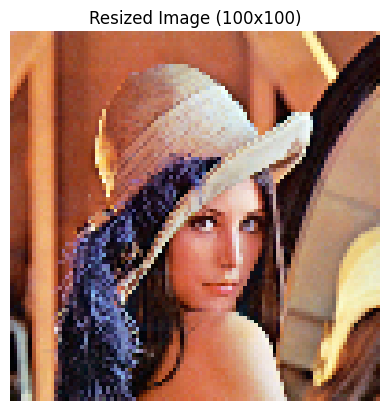

In [ ]:
print(f"Original Shape: {image.shape}")
resized = cv2.resize(image, (100, 100))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title("Resized Image (100x100)")
plt.axis('off')
plt.show()

## Section 3: Cropping and Rotation

### **Task 3**: Crop and Rotate the Image

*Instruction*: Use Keras to create a simple feedforward neural network with:


*   Crop the center square of the image
*   Rotate the image by 45 degrees using `cv2.getRotationMatrix2D`


In [ ]:
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# 1. Load the image
image = cv2.imread('/content/sample.jpg')  # Replace 'sample.jpg' with your image path
(h, w) = image.shape[:2]

# 2. Crop the center square
center_crop = image[h // 4:h * 3 // 4, w // 4:w * 3 // 4]

# 3. Rotate the cropped image by 45 degrees
center_crop_h, center_crop_w = center_crop.shape[:2]
M = cv2.getRotationMatrix2D((center_crop_w // 2, center_crop_h // 2), 45, 1.0)
rotated = cv2.warpAffine(center_crop, M, (center_crop_w, center_crop_h))

# 4. Preprocess the image for the neural network
img_size = (64, 64)
resized_img = cv2.resize(rotated, img_size)
normalized_img = resized_img / 255.0
input_img = np.expand_dims(normalized_img, axis=0)

# 5. Create a simple feedforward neural network
model = keras.Sequential([
    keras.Input(shape=(img_size[0], img_size[1], 3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 6. Compile the model (example)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 7. Use the model for prediction (example)
predictions = model.predict(input_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


## Section 4: Drawing & Annotation

### **Task 4**: Draw Shapes and Text on an Image

*Instruction*: Draw a rectangle, circle, line, and add text on the image.

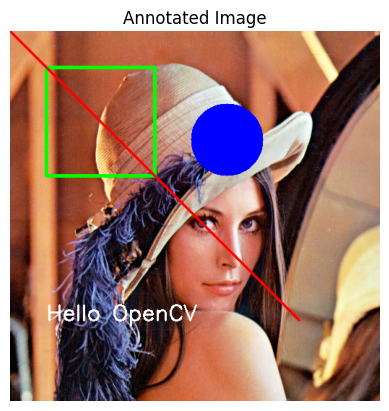

In [ ]:
annotated = image.copy()
cv2.rectangle(annotated, (50, 50), (200, 200), (0, 255, 0), 3)
cv2.circle(annotated, (300, 150), 50, (255, 0, 0), -1)
cv2.line(annotated, (0, 0), (400, 400), (0, 0, 255), 2)
cv2.putText(annotated, "Hello OpenCV", (50, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title("Annotated Image")
plt.axis('off')
plt.show()

## Section 5: Filters and Edge Detection

### **Task 5**:  Apply Blur and Canny Edge Detection

*Instruction*: Apply Gaussian blur and detect edges using the Canny algorithm.


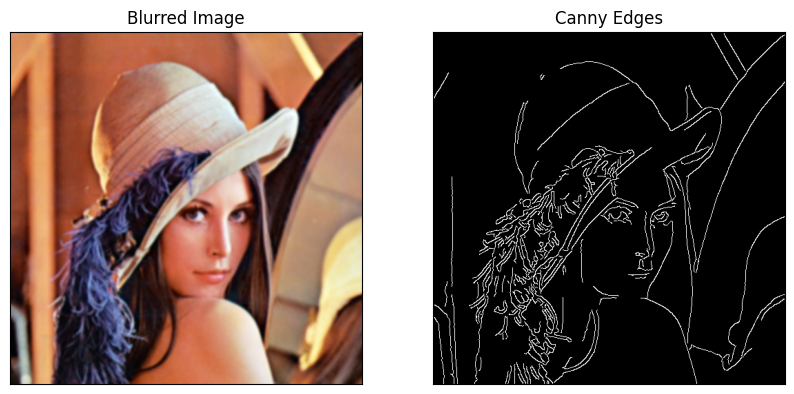

In [ ]:
import cv2
import matplotlib.pyplot as plt

blurred = cv2.GaussianBlur(image, (7, 7), 0)

edges = cv2.Canny(blurred, 100, 200)

plt.figure(figsize=(10, 5))

plt.subplot(121), plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)), plt.title('Blurred Image')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
plt.xticks([]), plt.yticks([])

plt.show()

## Section 6: Color Spaces and Histogram

### **Task 6**: Convert Color Spaces and Plot Histogram

*Instruction*: Convert the image to grayscale and HSV. Then plot a histogram of grayscale values.

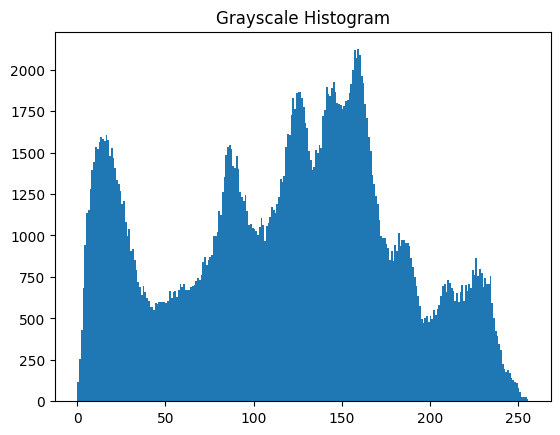

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plt.hist(gray.ravel(), bins=256, range=[0,256])
plt.title("Grayscale Histogram")
plt.show()